In [31]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
warnings.filterwarnings("ignore")
import random
import os


In [32]:
SEED = 42
random.seed(SEED)

np.random.seed(SEED)

import sklearn
sklearn.utils.check_random_state(SEED)

os.environ["PYTHONHASHSEED"] = str(SEED)

In [33]:
import requests
import pandas as pd
from io import StringIO

url = "https://osf.io/7s5yb/download?version=1"
response = requests.get(url)
df = pd.read_csv(StringIO(response.text))

info = df.info()
head = df.head()
columns = df.columns.tolist()

desc = df.describe(include='all')

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287829 entries, 0 to 287828
Data columns (total 48 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   comp_id               287829 non-null  float64
 1   begin                 287829 non-null  object 
 2   end                   287829 non-null  object 
 3   COGS                  18257 non-null   float64
 4   amort                 279789 non-null  float64
 5   curr_assets           287698 non-null  float64
 6   curr_liab             287698 non-null  float64
 7   extra_exp             269300 non-null  float64
 8   extra_inc             269300 non-null  float64
 9   extra_profit_loss     270626 non-null  float64
 10  finished_prod         17485 non-null   float64
 11  fixed_assets          287698 non-null  float64
 12  inc_bef_tax           280392 non-null  float64
 13  intang_assets         287689 non-null  float64
 14  inventories           287698 non-null  float64
 15  

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,1.001034e+06,2005-01-01,2005-12-31,NaN,692.592590,7266.666504,7574.074219,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
1,1.001034e+06,2006-01-01,2006-12-31,NaN,603.703674,13122.222656,12211.111328,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
2,1.001034e+06,2007-01-01,2007-12-31,NaN,425.925934,8196.295898,7800.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
3,1.001034e+06,2008-01-01,2008-12-31,NaN,300.000000,8485.185547,7781.481445,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
4,1.001034e+06,2009-01-01,2009-12-31,NaN,207.407410,5137.037109,15300.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287824,4.641209e+11,2011-01-01,2011-12-31,NaN,0.000000,1807.407349,3.703704,0.0,0.0,0.0,...,female,Domestic,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN
287825,4.641209e+11,2012-01-01,2012-12-31,NaN,0.000000,1518.518555,96.296295,0.0,0.0,0.0,...,female,Domestic,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN
287826,4.641209e+11,2013-01-01,2013-12-31,NaN,0.000000,988.888916,77.777779,0.0,0.0,0.0,...,NaN,NaN,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN
287827,4.641209e+11,2014-01-01,2014-12-31,NaN,0.000000,644.444458,233.333328,0.0,0.0,0.0,...,female,Domestic,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN


In [ ]:
print(df["year"].min(), "→", df["year"].max())

df = (
    df.set_index(["year", "comp_id"])
    .unstack(fill_value="toReplace")
    .stack()
    .reset_index()
)
data = df.replace("toReplace", np.nan)  

2005 → 2016


In [35]:

df['year'] = df['year'].astype(int)
df = df[(df['year'] >= 2010) & (df['year'] <= 2015)].copy()

df = df.drop(columns=["COGS", "finished_prod", "net_dom_sales", "net_exp_sales", "wages"], errors='ignore')


df.sort_values(by=['comp_id', 'year'], inplace=True)

df['sales_next'] = df.groupby('comp_id')['sales'].shift(-1)
df['labor_next'] = df.groupby('comp_id')['labor_avg'].shift(-1)
df['year_next'] = df.groupby('comp_id')['year'].shift(-1)
df['exit_year'] = pd.to_numeric(df['exit_year'], errors='coerce')

df = df[
    (df['exit_year'].isna()) | (df['exit_year'] > df['year'])
]

df_clean = df.dropna(subset=['sales', 'sales_next'])

df_clean


,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,...,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,sales_next,labor_next,year_next
5,1.001034e+06,2010-01-01,2010-12-31,177.777771,2096.296387,19629.628906,0.0,0.0,0.0,637.037048,...,56.0,3.0,1,Central,1990-11-19,NaN,0.083333,0.000000,0.083333,2011.0
6,1.001034e+06,2011-01-01,2011-12-31,155.555557,3607.407471,22555.554688,0.0,0.0,0.0,481.481476,...,56.0,3.0,1,Central,1990-11-19,NaN,0.083333,0.000000,0.083333,2012.0
7,1.001034e+06,2012-01-01,2012-12-31,140.740738,148.148148,21429.628906,0.0,0.0,0.0,340.740753,...,56.0,3.0,1,Central,1990-11-19,NaN,0.083333,0.000000,NaN,2013.0
8,1.001034e+06,2013-01-01,2013-12-31,140.740738,140.740738,21851.851562,0.0,0.0,0.0,200.000000,...,56.0,3.0,1,Central,1990-11-19,NaN,NaN,0.000000,NaN,2014.0
9,1.001034e+06,2014-01-01,2014-12-31,29.629629,144.444443,22340.740234,0.0,0.0,0.0,170.370377,...,56.0,3.0,1,Central,1990-11-19,NaN,NaN,0.000000,NaN,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287823,4.641209e+11,2010-01-01,2010-12-31,0.000000,1781.481445,0.000000,0.0,0.0,0.0,0.000000,...,55.0,3.0,2,East,1990-08-22,NaN,NaN,288.888885,NaN,2011.0
287824,4.641209e+11,2011-01-01,2011-12-31,0.000000,1807.407349,3.703704,0.0,0.0,0.0,0.000000,...,55.0,3.0,2,East,1990-08-22,NaN,NaN,0.000000,NaN,2012.0
287825,4.641209e+11,2012-01-01,2012-12-31,0.000000,1518.518555,96.296295,0.0,0.0,0.0,0.000000,...,55.0,3.0,2,East,1990-08-22,NaN,NaN,0.000000,NaN,2013.0
287826,4.641209e+11,2013-01-01,2013-12-31,0.000000,988.888916,77.777779,0.0,0.0,0.0,0.000000,...,55.0,3.0,2,East,1990-08-22,NaN,NaN,0.000000,NaN,2014.0


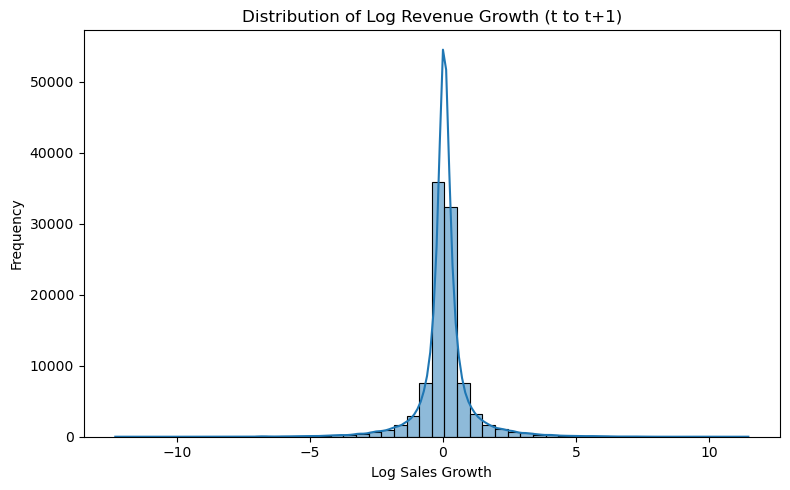

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,...,ind,urban_m,region_m,founded_date,exit_date,labor_avg,sales_next,labor_next,year_next,log_sales_growth
5,1001034.0,2010-01-01,2010-12-31,177.777771,2096.296387,19629.628906,0.0,0.0,0.0,637.037048,...,3.0,1,Central,1990-11-19,NaN,0.083333,0.0,0.083333,2011.0,-inf
6,1001034.0,2011-01-01,2011-12-31,155.555557,3607.407471,22555.554688,0.0,0.0,0.0,481.481476,...,3.0,1,Central,1990-11-19,NaN,0.083333,0.0,0.083333,2012.0,NaN
7,1001034.0,2012-01-01,2012-12-31,140.740738,148.148148,21429.628906,0.0,0.0,0.0,340.740753,...,3.0,1,Central,1990-11-19,NaN,0.083333,0.0,NaN,2013.0,NaN
8,1001034.0,2013-01-01,2013-12-31,140.740738,140.740738,21851.851562,0.0,0.0,0.0,200.000000,...,3.0,1,Central,1990-11-19,NaN,NaN,0.0,NaN,2014.0,NaN
9,1001034.0,2014-01-01,2014-12-31,29.629629,144.444443,22340.740234,0.0,0.0,0.0,170.370377,...,3.0,1,Central,1990-11-19,NaN,NaN,0.0,NaN,2015.0,NaN


In [36]:

df_clean['log_sales_growth'] = np.log(df_clean['sales_next'] / df_clean['sales'])

plt.figure(figsize=(8, 5))
sns.histplot(df_clean['log_sales_growth'], bins=50, kde=True)
plt.title("Distribution of Log Revenue Growth (t to t+1)")
plt.xlabel("Log Sales Growth")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

df_clean.head()


In [ ]:
df["sales"].describe()


In [ ]:
df["sales"] = np.where(
    df["sales"] < 0, 1, df["sales"]
)  
df = df.assign(
    ln_sales=np.where(
        df["sales"] > 0,
        np.log(df["sales"]),
        (np.where(df["sales"].isna(), np.nan, 0)),
    ), 
    sales_mil=df["sales"] / 1000000,
    sales_mil_log=np.where(
        df["sales"] > 0,
        np.log(df["sales"] / 1000000),
        (np.where(df["sales"].isna(), np.nan, 0)),
    ),
)

In [ ]:
df["d1_sales_mil_log"] = df["sales_mil_log"] - df.groupby("comp_id")[
    "sales_mil_log"
].shift(1)

In [ ]:
df["age"] = np.where(
    df["year"] - df["founded_year"] < 0, 0, df["year"] - df["founded_year"]
)
df["new"] = np.where(
    ((df["age"] <= 1) | (df["balsheet_notfullyear"] == 1)),
    1,
    (np.where(df["age"].isna(), np.nan, 0)),
)
df["d1_sales_mil_log"] = np.where(
    df["new"] == 1, 0, np.where(df["new"].isna(), np.nan, df["d1_sales_mil_log"])
)
df["new"] = np.where(df["d1_sales_mil_log"].isna(), 1, df["new"])
df["d1_sales_mil_log"] = np.where(
    df["d1_sales_mil_log"].isna(), 0, df["d1_sales_mil_log"]
)